# Plant Seedlings Classification - Red Neuronal

## 0. Librerías

In [55]:
import tensorflow as tf
import numpy as np
from skimage import io
import os
import matplotlib.pyplot as plt


## 1. Preparación de los datos

### 1.1. Diccionario con las rutas de las imágenes.

In [26]:
# Establecer directorio de los datos de entrenamiento
base_path = "my_dataset/train"

# Crear un diccionario vacío para almacenar la imagen y su etiqueta
images_dict = {}

# Recorrer cada carpeta de clase en el directorio
for plant_class_name in os.listdir(base_path):
    # Crear la ruta completa a la carpeta de clase
    plant_class_path = os.path.join(base_path, plant_class_name)

    # Verificar si la ruta es un directorio para evitar archivos sueltos
    if os.path.isdir(plant_class_path):
        # Recorrer cada imagen en la carpeta de clase
        for image_name in os.listdir(plant_class_path):
            # Crear la ruta completa a la imagen
            image_path = os.path.join(plant_class_path, image_name)

            # Agregar la ruta de la imagen y su etiqueta al diccionario
            images_dict[image_path] = plant_class_name

print(images_dict)

{'my_dataset/train\\Black-grass\\0050f38b3.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0183fdf68.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0260cffa8.png': 'Black-grass', 'my_dataset/train\\Black-grass\\05eedce4d.png': 'Black-grass', 'my_dataset/train\\Black-grass\\075d004bc.png': 'Black-grass', 'my_dataset/train\\Black-grass\\078eae073.png': 'Black-grass', 'my_dataset/train\\Black-grass\\082314602.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0ace21089.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0b228a6b8.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0b3e7a7a9.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0bb75ded8.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0be707615.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0c67c3fc3.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0d1a9985f.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0d28c429b.png': 'Black-grass', 'my_dataset/train\\Black-grass\\0d4f74f4a.png': 'Black

### 1.2. Carga de los datos

In [56]:
# Lectura de los datos del diccionario a X_train, y_train
X_train = []
y_train = []

for path, label in images_dict.items():
    image = io.imread(path)
    X_train.append(image)
    y_train.append(label)

### 1.3. Inspección del conjunto de datos

In [60]:
shapes = [img.shape for img in X_train]
print(set(shapes))  # Imprime las formas únicas de las imágenes en X_train

{(190, 190, 3), (717, 717, 3), (96, 96, 3), (328, 328, 3), (1109, 1109, 3), (457, 457, 3), (363, 363, 3), (674, 674, 3), (442, 442, 3), (532, 532, 3), (485, 508, 4), (1283, 1367, 3), (182, 182, 3), (602, 602, 3), (834, 834, 3), (1412, 1413, 3), (382, 382, 3), (574, 574, 3), (1141, 1141, 3), (559, 559, 3), (1007, 1007, 3), (511, 511, 3), (122, 122, 3), (417, 417, 3), (649, 649, 3), (67, 67, 3), (634, 634, 3), (361, 361, 3), (1041, 1041, 3), (236, 236, 3), (142, 142, 3), (1026, 1026, 3), (436, 436, 3), (396, 396, 3), (628, 628, 3), (86, 86, 3), (766, 766, 3), (534, 534, 3), (613, 613, 3), (1293, 1293, 3), (1061, 1061, 3), (1313, 1349, 3), (703, 703, 3), (121, 121, 3), (1453, 1453, 3), (1005, 1005, 3), (259, 259, 3), (338, 338, 3), (196, 196, 3), (428, 428, 3), (682, 682, 3), (140, 140, 3), (588, 588, 3), (667, 667, 3), (820, 820, 3), (238, 238, 3), (805, 805, 3), (407, 407, 3), (545, 545, 3), (313, 313, 3), (965, 965, 3), (1197, 1197, 3), (799, 799, 3), (874, 874, 3), (222, 222, 3), (312

Las imágenes tienen distintas dimensiones.

In [98]:
# Inspección del conjunto de datos
print("Total de imágenes:", len(X_train))
print("Total de etiquetas:", len(y_train))

# Tipo de etiquetas
print(f"\n{list(set(y_train))}")

Total de imágenes: 4750
Total de etiquetas: 4750

['Maize', 'Sugar beet', 'Shepherds Purse', 'Fat Hen', 'Small-flowered Cranesbill', 'Charlock', 'Common wheat', 'Scentless Mayweed', 'Black-grass', 'Common Chickweed', 'Loose Silky-bent', 'Cleavers']


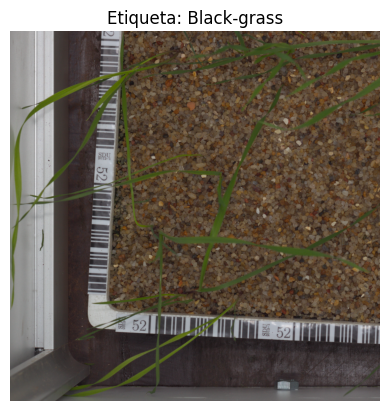

In [93]:
# Visualización de los datos
def display_digit(X_train, y_train, number):
    image = X_train[number]
    label = y_train[number]
    plt.title("Etiqueta: " + str(label))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

display_digit(X_train=X_train, y_train=y_train, number=np.random.randint(0, 4750))

### 1.4. Acondicionamiento del conjunto de datos